In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [27]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [28]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.504173,0.317587,0.772968,-4.331792,-0.891851,0
1,-0.101531,-1.378436,1.646632,-1.034417,-2.230589,1
2,-1.925359,0.105939,1.701849,0.118833,-0.465804,0
3,-2.226608,0.670525,-0.581766,1.215643,-2.438574,0
4,-0.891768,2.077880,0.228470,-0.442126,-1.976545,0


In [29]:
#function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [30]:
#function for feature sampling
def simple_feature(df,percent):
    cols=random.sample(df.columns.tolist()[:,-1],int(percent*(df.shape[1]-1)))
    new_df=df[cols]
    new_df['target']=df['target']
    return new_df

In [31]:
#function for combind sampling
def combind_sample(df,row_percent,col_percent):
    new_df=sample_rows(df,row_percent)
    return sample_feature(new_df,col_percent)
    

In [32]:
df1=sample_rows(df,0.1)

In [33]:
df2=sample_rows(df,0.1)

In [34]:
df3=sample_rows(df,0.1)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [36]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [37]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6, 0.8333333333333334, 'x[1] <= -1.006\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[4] <= 1.158\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

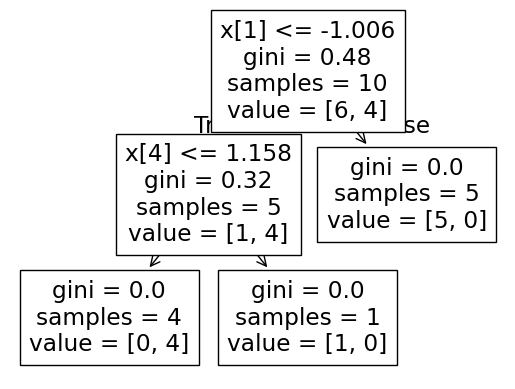

In [38]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.195\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

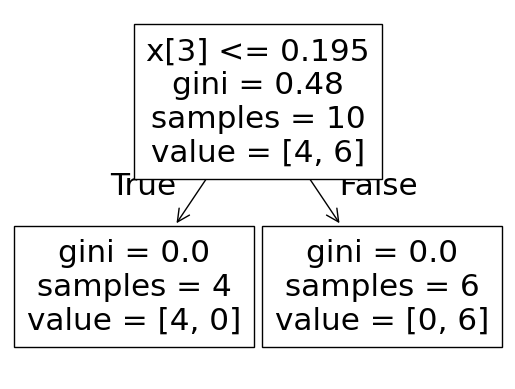

In [39]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= -0.527\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.625, 0.5, '  False')]

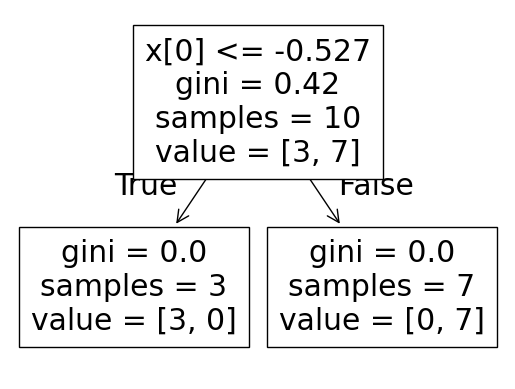

In [40]:
plot_tree(clf3)

In [41]:
clf1.predict(np.array([-0.122194,	-0.140290,	0.336055,	1.581372,	-0.574607]).reshape(1,5))

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [42]:
clf2.predict(np.array([-0.122194,	-0.140290,	0.336055,	1.581372,	-0.574607]).reshape(1,5))

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [43]:
clf3.predict(np.array([-0.122194,	-0.140290,	0.336055,	1.581372,	-0.574607]).reshape(1,5))

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])